# Analyzing Audio - President Kennedy's Speech at Rice University 🔊 

Utilizing the **Spectrum** 🧠 service to transcribe audio to text and perform emotion recognition on the audio. For more information about the service, visit: [docs.neuroquest.ai/spectrum](https://docs.neuroquest.ai/spectrum/)

We've included an excerpt from *John F. Kennedy's* speech on September 12, 1962, where he announced that the United States would send men to the moon 🌙. See
video:

- [https://www.youtube.com/watch?v=WZyRbnpGyzQ](https://www.youtube.com/watch?v=WZyRbnpGyzQ)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import librosa
import IPython.display as ipd
from IPython.display import JSON

import utility as U

In [2]:
NQ_USER = os.getenv("NQ_USER")
NQ_PASSWORD = os.getenv("NQ_PASSWORD")

In [3]:
AUDIO_TARGET_FILE = "./audio/John-F-Kennedy-Speech-1962-09-12-CUT.mp3"

## Checking the audio 🎶

In [4]:
ipd.Audio(AUDIO_TARGET_FILE)

In [5]:
y, sr = librosa.load(AUDIO_TARGET_FILE)

In [6]:
y_trimmed, _ = librosa.effects.trim(y, top_db=5)

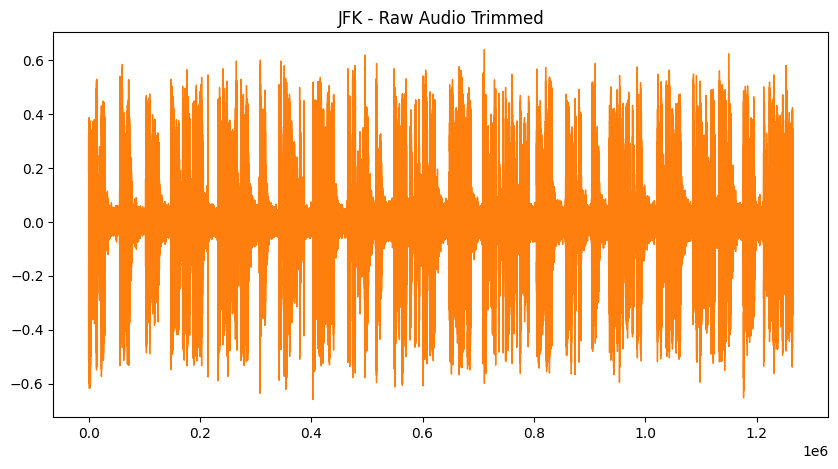

In [26]:
pd.Series(y_trimmed).plot(
    figsize=(10, 5), lw=1, title="JFK - Raw Audio Trimmed", color="#ff7f0e"
)
plt.show()

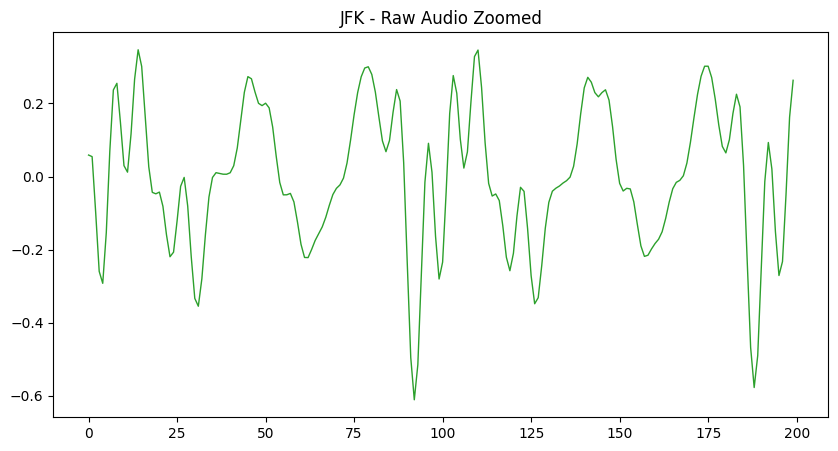

In [8]:
pd.Series(y[30000:30200]).plot(
    figsize=(10, 5), lw=1, title="JFK - Raw Audio Zoomed", color="#2ca02c"
)
plt.show()

## Creating an audio-to-text transcription analysis 🗣️

In [9]:
if not os.path.exists("audio-transcription-result.json"):
    print("Sending the audio for transcription...")
    transcription = U.audio_to_text(
        token=U.login(user=NQ_USER, password=NQ_PASSWORD).get("data").get("token"),
        audio_file=AUDIO_TARGET_FILE,
        audio_lang="en",
        save_result=True,
    )
else:
    print("Reading the saved result...")
    transcription = U.get_audio_to_text_in_file()

Reading the saved result...


In [10]:
JSON(transcription, expanded=True)

<IPython.core.display.JSON object>

In [11]:
transcription.get("data").get("document_id")

'65omp6YRWTylw6xIqpRF'

In [12]:
transcription.get("data").get("transcript")

"Can we help decide whether this new ocean will be a sea of tea or a new terrifying Theater of War. I do not say that we should or will go unprotected against the hostel misuse of space anymore than we go in protecting against the hostile or see but I do say that space can be explored and nasty without feeding the fires of War without repeating the mistakes that man is made and extending his rent around this Global hours. There is no Strife. No Prejudice. No National conflict in outer space. It hasn't the Hostile to it. All its Conquest deserves the best of all mankind and it's opportunity for peaceful cooperation may never come again."

In [13]:
transcription.get("data").get("confidence")

92.3110693693161

## Creating a speech-emotion-recognition analysis 🎤😊

In [14]:
if not os.path.exists("audio-ser-result.json"):
    print("Sending audio data for emotion recognition...")
    ser = U.audio_ser(
        token=U.login(user=NQ_USER, password=NQ_PASSWORD).get("data").get("token"),
        audio_document_id=transcription.get("data").get("document_id"),
        save_result=True,
    )
else:
    print("Reading the saved result...")
    ser = U.get_audio_ser_file()

Sending audio data for emotion recognition...


In [15]:
JSON(ser, expanded=True)

<IPython.core.display.JSON object>

In [16]:
audio_emotions = ser.get("data").get("speech_emotion_recognition") or []

In [18]:
pd.DataFrame(audio_emotions)

,emotion,result
0,angry,4.474537
1,disgust,0.886952
2,fear,8.856346
3,happy,85.781777
4,neutral,0.000004
5,sad,0.000381


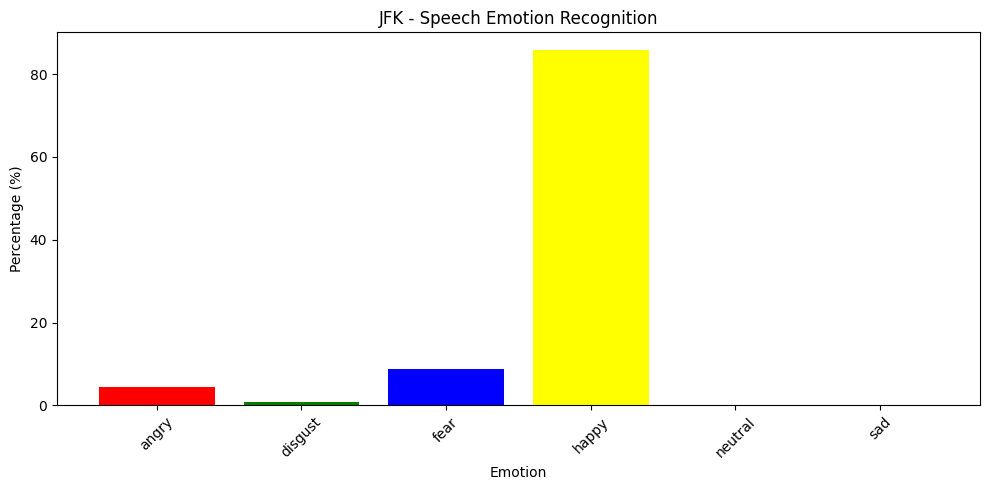

In [23]:
emotions = [str(x["emotion"]).capitalize() for x in audio_emotions]
results = [x["result"] for x in audio_emotions]

plt.figure(figsize=(10, 5))
plt.bar(emoções, resultados, color=["red", "green", "blue", "yellow", "gray", "purple"])
plt.xlabel("Emotion")
plt.ylabel("Percentage (%)")
plt.title("JFK - Speech Emotion Recognition")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()